In [130]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud
%matplotlib inline

In [131]:
df= pd.read_csv("all-data.csv",encoding='ISO-8859-1')

In [132]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [133]:
df.columns

Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')

In [134]:
df=df.rename(columns={'neutral':'Sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Headline'})

In [135]:
df.head()

,Sentiment,Headline
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [136]:
df.describe()

,Sentiment,Headline
count,4845,4845
unique,3,4837
top,neutral,SSH Communications Security Corporation is hea...
freq,2878,2


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
Sentiment    4845 non-null object
Headline     4845 non-null object
dtypes: object(2)
memory usage: 75.8+ KB


In [138]:
df['Sentiment'].value_counts()

neutral     2878
positive    1363
negative     604
Name: Sentiment, dtype: int64

In [139]:
df['Length'] = df['Headline'].apply(len)

In [140]:
df.head()

,Sentiment,Headline,Length
0,neutral,Technopolis plans to develop in stages an area...,190
1,negative,The international electronic industry company ...,228
2,positive,With the new production plant the company woul...,206
3,positive,According to the company 's updated strategy f...,203
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178


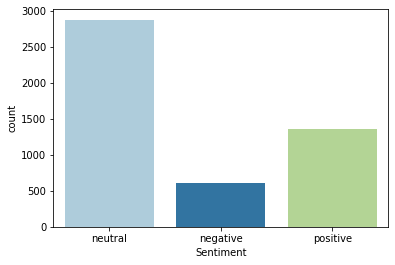

In [141]:
sns.countplot('Sentiment',data=df,palette='Paired')

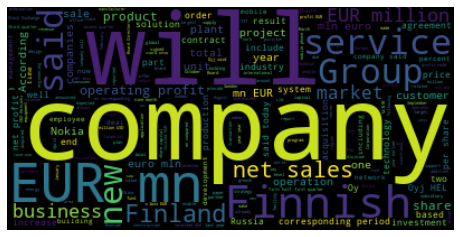

In [142]:
text = "".join(w for w in df['Headline'])
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



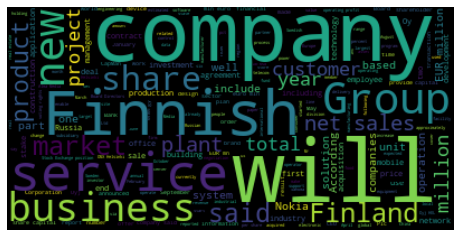

In [143]:
text = "".join(w for w in df['Headline'][df['Sentiment']=='neutral'])
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



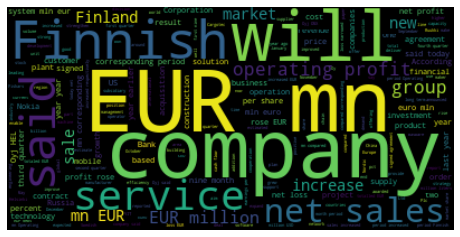

In [144]:
text = "".join(w for w in df['Headline'][df['Sentiment']=='positive'])
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



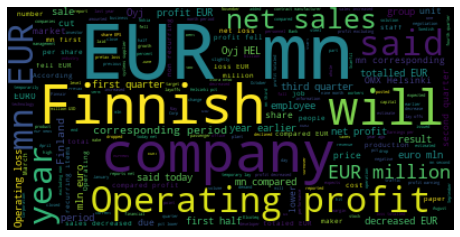

In [145]:
text = "".join(w for w in df['Headline'][df['Sentiment']=='negative'])
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



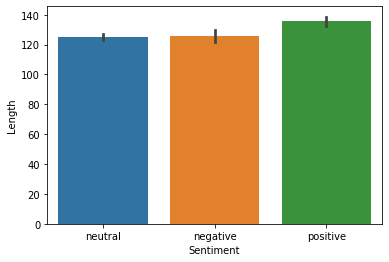

In [146]:
sns.barplot('Sentiment','Length',data=df)

In [147]:
for x in range(1,10):
    print("\n",df['Headline'][x])


 The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .

 With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .

 According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .

 FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .

 For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a p

There are alot of numbers and special char in the messaes. Although this is a Financial news dataset i feel numbers and symbols wont help to determine the Sentiment so we will reomve them. Also The word 'EUR' Has to be removed as it refers to crrency

In [148]:
df1=df.copy()

In [149]:
df.head()

,Sentiment,Headline,Length
0,neutral,Technopolis plans to develop in stages an area...,190
1,negative,The international electronic industry company ...,228
2,positive,With the new production plant the company woul...,206
3,positive,According to the company 's updated strategy f...,203
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178


In [151]:
review = df.iloc[:,1].values
labels = df.iloc[:,0].values

In [162]:
reviews_processed =[]
for x in range(0,len(review)):
    #remove numbers
    review_processed = re.sub(r'\d', ' ', str(review[x]))
    
    # Remove all the special characters
    review_processed = re.sub(r'\W', ' ',review_processed )
    
     # remove all single characters
    review_processed = re.sub(r'\s+[a-zA-Z]\s+', ' ', review_processed)
    
    #remove EUR
    review_processed.replace('EUR'," ")
    
    # Substituting multiple spaces with single space
    review_processed = re.sub(r'\s+', ' ', review_processed, flags=re.I)
    
    review_processed = review_processed.lower()

    reviews_processed.append(review_processed)
    


In [175]:
reviews_processed[20]

' filippova trilateral agreement on investment in the construction of technology park in st petersburg was to have been signed in the course of the forum days of the russian economy that opened in helsinki today '

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [178]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
reviews_processed = vectorizer.fit_transform(reviews_processed).toarray()

In [179]:
reviews_processed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_processed, labels, test_size=0.3,random_state=0)

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [183]:
predictions = text_classifier.predict(X_test)

In [184]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 68  84  28]
 [ 18 803  58]
 [ 11 180 204]]
              precision    recall  f1-score   support

    negative       0.70      0.38      0.49       180
     neutral       0.75      0.91      0.83       879
    positive       0.70      0.52      0.60       395

    accuracy                           0.74      1454
   macro avg       0.72      0.60      0.64      1454
weighted avg       0.73      0.74      0.72      1454

0.7393397524071527


#MUltinomial 

In [187]:
from sklearn.naive_bayes import MultinomialNB
MLB = MultinomialNB().fit(X_train, y_train)

In [190]:
prediction= text_classifier.predict(X_test)

In [191]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

[[ 68  84  28]
 [ 18 803  58]
 [ 11 180 204]]
              precision    recall  f1-score   support

    negative       0.70      0.38      0.49       180
     neutral       0.75      0.91      0.83       879
    positive       0.70      0.52      0.60       395

    accuracy                           0.74      1454
   macro avg       0.72      0.60      0.64      1454
weighted avg       0.73      0.74      0.72      1454

0.7393397524071527
